In [1]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_train = pd.read_csv('./data/train_data.csv')
df_train.shape

(7160, 14)

In [3]:
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
df_train.drop(['Customer Id'],axis = 1,inplace = True)

In [5]:
df_train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [6]:
df_train.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7153 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7054 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   6652 non-null   float64
 10  NumberOfWindows     7160 non-null   object 
 11  Geo_Code            7058 non-null   object 
 12  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 727.3+ KB


In [9]:
df_train.isna().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [10]:
df_train = df_train.fillna(df_train.mode().iloc[0])

In [11]:
df_train.isna().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df_train['Building_Painted']  = Lb.fit_transform(df_train['Building_Painted'])
df_train['Building_Fenced']  = Lb.fit_transform(df_train['Building_Fenced'])
df_train['Garden']  = Lb.fit_transform(df_train['Garden'])
df_train['Settlement']  = Lb.fit_transform(df_train['Settlement'])
df_train['NumberOfWindows']  = Lb.fit_transform(df_train['NumberOfWindows'])
df_train['Geo_Code']  = Lb.fit_transform(df_train['Geo_Code'])

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   int32  
 4   Building_Fenced     7160 non-null   int32  
 5   Garden              7160 non-null   int32  
 6   Settlement          7160 non-null   int32  
 7   Building Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  NumberOfWindows     7160 non-null   int32  
 11  Geo_Code            7160 non-null   int32  
 12  Claim               7160 non-null   int64  
dtypes: float64(3), int32(6), int64(4)
memory usage: 559.5 KB


In [14]:
df_train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,7,0
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,7,0
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,7,0
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,7,0
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,7,0


In [15]:
## Independent And dependent features
X=df_train.drop('Claim',axis=1)
y=df_train['Claim']

In [16]:
X.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,7
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,7
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,7
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,7
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,7


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [18]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
X_train.shape,X_val.shape

((5728, 12), (1432, 12))

In [20]:
## Feature Selection based on correlaltion
X_train.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
YearOfObservation,1.000000,0.029183,-0.036221,0.048937,-0.110698,-0.110528,-0.110359,0.007659,0.001826,-0.017237,0.088735,0.006455
Insured_Period,0.029183,1.000000,-0.047558,-0.032316,-0.048760,-0.048891,-0.048013,0.015471,-0.027031,0.006822,0.045532,0.001798
Residential,-0.036221,-0.047558,1.000000,-0.036602,-0.077599,-0.077370,-0.077901,0.068588,0.332391,-0.049354,0.132202,0.314368
Building_Painted,0.048937,-0.032316,-0.036602,1.000000,-0.578100,-0.578303,-0.578506,0.082876,-0.048639,-0.090034,0.495970,0.015167
Building_Fenced,-0.110698,-0.048760,-0.077599,-0.578100,1.000000,0.999651,0.999302,-0.150258,-0.015708,0.154459,-0.858903,-0.054210
Garden,-0.110528,-0.048891,-0.077370,-0.578303,0.999651,1.000000,0.999651,-0.150204,-0.015642,0.154350,-0.859999,-0.054244
Settlement,-0.110359,-0.048013,-0.077901,-0.578506,0.999302,0.999651,1.000000,-0.149980,-0.015575,0.154392,-0.859698,-0.054630
Building Dimension,0.007659,0.015471,0.068588,0.082876,-0.150258,-0.150204,-0.149980,1.000000,0.018471,0.196943,0.307577,0.026096
Building_Type,0.001826,-0.027031,0.332391,-0.048639,-0.015708,-0.015642,-0.015575,0.018471,1.000000,-0.134773,0.113845,0.290931
Date_of_Occupancy,-0.017237,0.006822,-0.049354,-0.090034,0.154459,0.154350,0.154392,0.196943,-0.134773,1.000000,-0.136776,0.017633


<Axes: >

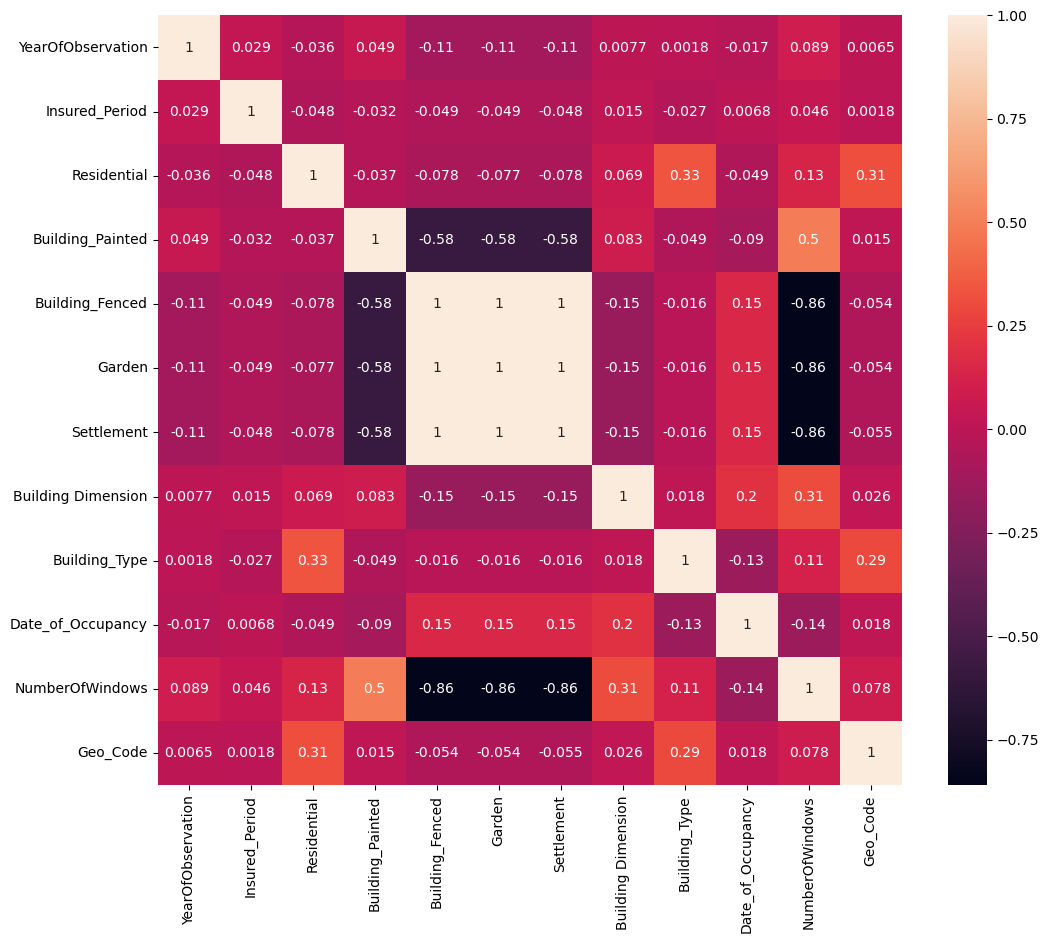

In [21]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
correlation(X_train,0.85)

{'Garden', 'NumberOfWindows', 'Settlement'}

In [24]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [25]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_val.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_val.shape

((5728, 9), (1432, 9))

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_val)

In [27]:
X_train_scaled

array([[ 1.68333   ,  0.36173668,  1.52019165, ...,  1.945864  ,
        -0.11626506,  0.84447931],
       [ 0.96004486,  0.37325912, -0.6578118 , ..., -0.19059546,
        -0.11626506,  0.98053846],
       [-0.48652543,  0.37325912, -0.6578118 , ...,  0.87763427,
         0.17024598, -1.04751303],
       ...,
       [ 0.23675971,  0.37325912,  1.52019165, ...,  1.945864  ,
        -1.72072684,  0.839345  ],
       [-1.20981057,  0.37325912,  1.52019165, ..., -0.19059546,
        -0.11626506,  0.92919538],
       [-1.20981057,  0.37325912,  1.52019165, ..., -1.25882518,
        -0.40277609, -1.4377204 ]])

C:\Users\USER\AppData\Local\Temp\ipykernel_6988\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

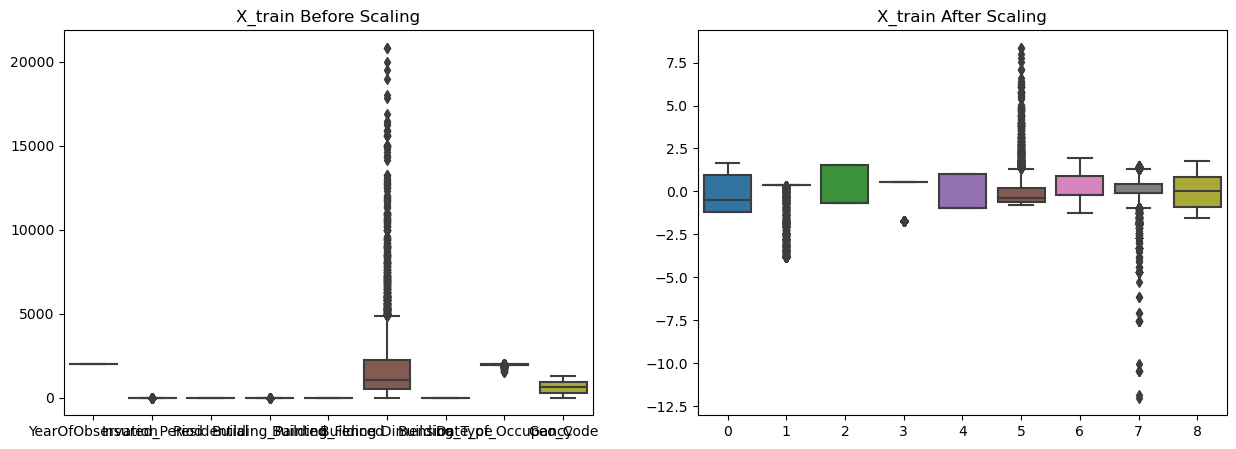

In [28]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

AUC: 0.7138141749288309


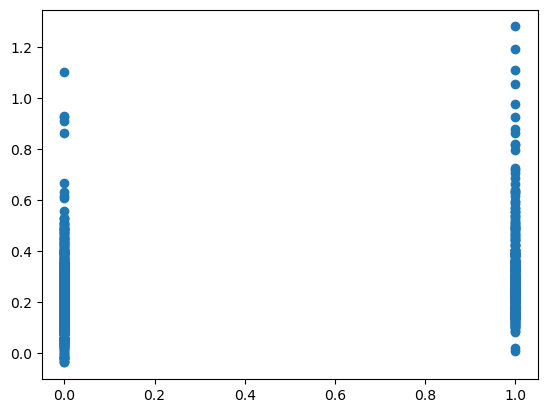

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_val_scaled)
auc = roc_auc_score(y_val, y_pred)
print("AUC:", auc)
plt.scatter(y_val,y_pred)

AUC: 0.7138059945682406


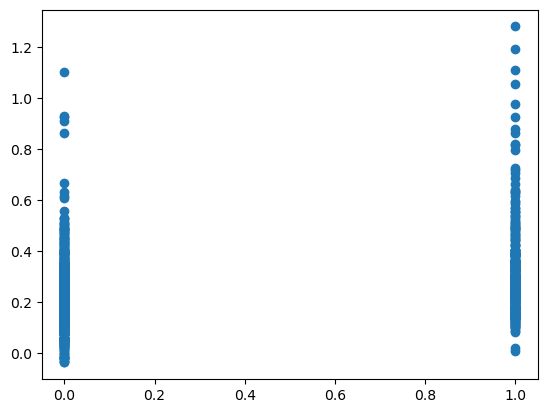

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import roc_auc_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_val_scaled)
auc = roc_auc_score(y_val, y_pred)
print("AUC:", auc)
plt.scatter(y_val,y_pred)

In [99]:
df_test = pd.read_csv('./data/test_data.csv')
df_test.shape

(3069, 13)

In [100]:
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [101]:
df_test.drop(['Customer Id'],axis = 1,inplace = True)

In [102]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   3069 non-null   int64  
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   object 
 4   Building_Fenced     3069 non-null   object 
 5   Garden              3065 non-null   object 
 6   Settlement          3069 non-null   object 
 7   Building Dimension  3056 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   Date_of_Occupancy   2341 non-null   float64
 10  NumberOfWindows     3069 non-null   object 
 11  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 287.8+ KB


In [103]:
df_test.isna().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [104]:
df_test = df_test.fillna(df_test.mode().iloc[0])

In [105]:
df_test.isna().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [106]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df_test['Building_Painted']  = Lb.fit_transform(df_test['Building_Painted'])
df_test['Building_Fenced']  = Lb.fit_transform(df_test['Building_Fenced'])
df_test['Garden']  = Lb.fit_transform(df_test['Garden'])
df_test['Settlement']  = Lb.fit_transform(df_test['Settlement'])
df_test['NumberOfWindows']  = Lb.fit_transform(df_test['NumberOfWindows'])
df_test['Geo_Code']  = Lb.fit_transform(df_test['Geo_Code'])

In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   3069 non-null   int64  
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   int32  
 4   Building_Fenced     3069 non-null   int32  
 5   Garden              3069 non-null   int32  
 6   Settlement          3069 non-null   int32  
 7   Building Dimension  3069 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   Date_of_Occupancy   3069 non-null   float64
 10  NumberOfWindows     3069 non-null   int32  
 11  Geo_Code            3069 non-null   int32  
dtypes: float64(3), int32(6), int64(3)
memory usage: 215.9 KB


In [108]:
df_test.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,2013,1.000000,0,1,0,0,0,300.0,1,1960.0,3,142
1,2016,0.997268,0,1,0,0,0,300.0,1,1960.0,3,142
2,2013,0.369863,0,1,1,1,1,790.0,1,1960.0,0,142
3,2014,1.000000,0,1,0,0,0,1405.0,1,2004.0,3,143
4,2016,1.000000,0,1,0,0,0,1405.0,1,2004.0,3,143


In [109]:
## Feature Selection based on correlaltion
df_test.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
YearOfObservation,1.000000,0.031171,-0.082266,0.071710,-0.078545,-0.076187,-0.078545,0.016144,-0.004241,-0.013809,0.086950,-0.017490
Insured_Period,0.031171,1.000000,-0.100659,0.128857,-0.107261,-0.107360,-0.107261,0.010686,-0.064767,-0.013474,0.095979,-0.031967
Residential,-0.082266,-0.100659,1.000000,-0.231612,0.075388,0.073923,0.075388,-0.051000,0.215018,-0.025663,-0.074516,0.204796
Building_Painted,0.071710,0.128857,-0.231612,1.000000,-0.548756,-0.546928,-0.548756,0.061950,-0.210697,-0.097672,0.495342,-0.054376
Building_Fenced,-0.078545,-0.107261,0.075388,-0.548756,1.000000,0.996695,1.000000,-0.074366,0.002163,0.188870,-0.902875,-0.013487
Garden,-0.076187,-0.107360,0.073923,-0.546928,0.996695,1.000000,0.996695,-0.074349,-0.001100,0.192607,-0.902056,-0.011572
Settlement,-0.078545,-0.107261,0.075388,-0.548756,1.000000,0.996695,1.000000,-0.074366,0.002163,0.188870,-0.902875,-0.013487
Building Dimension,0.016144,0.010686,-0.051000,0.061950,-0.074366,-0.074349,-0.074366,1.000000,0.068659,0.183799,0.196865,-0.010221
Building_Type,-0.004241,-0.064767,0.215018,-0.210697,0.002163,-0.001100,0.002163,0.068659,1.000000,-0.163457,0.048108,0.175531
Date_of_Occupancy,-0.013809,-0.013474,-0.025663,-0.097672,0.188870,0.192607,0.188870,0.183799,-0.163457,1.000000,-0.173612,0.066116


<Axes: >

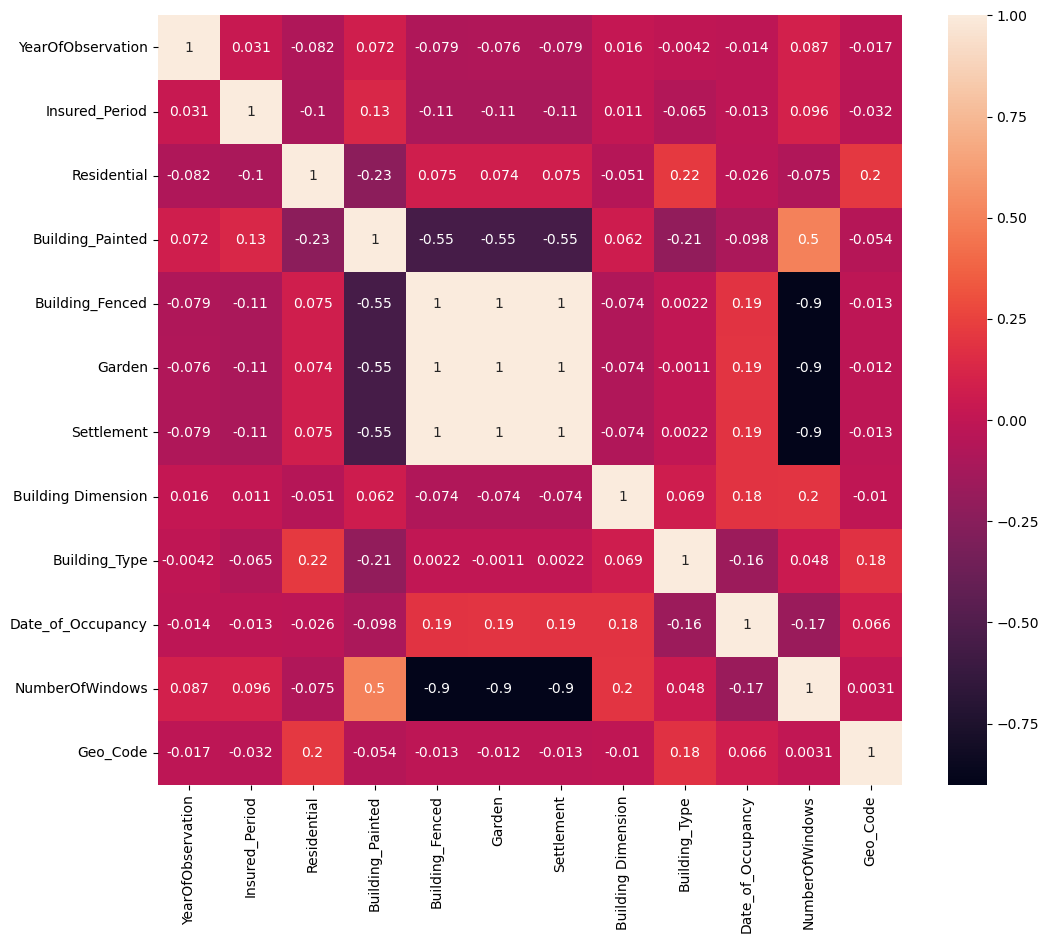

In [110]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=df_test.corr()
sns.heatmap(corr,annot=True)

In [111]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [112]:
correlation(df_test,0.85)

{'Garden', 'NumberOfWindows', 'Settlement'}

In [113]:
## threshold--Domain expertise
corr_features=correlation(df_test,0.85)

In [114]:
## drop features when correlation is more than 0.85 
df_test.drop(corr_features,axis=1,inplace=True)
df_test.shape

(3069, 9)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_test_scaled=scaler.fit_transform(df_test)
df_test_scaled=scaler.transform(df_test)

In [116]:
df_test_scaled

array([[-0.43273737,  0.35243804, -0.53754462, ..., -1.36171381,
        -0.23274404, -0.83850409],
       [ 1.75398765,  0.33996376, -0.53754462, ..., -1.36171381,
        -0.23274404, -0.83850409],
       [-0.43273737, -2.52450771, -0.53754462, ..., -1.36171381,
        -0.23274404, -0.83850409],
       ...,
       [-1.16164572,  0.35243804, -0.53754462, ..., -0.36001206,
         1.25198875,  0.15088051],
       [-0.43273737,  0.35243804, -0.53754462, ..., -1.36171381,
        -7.43144846,  0.15088051],
       [-1.16164572,  0.35243804, -0.53754462, ..., -0.36001206,
        -0.68266306,  0.15088051]])

C:\Users\USER\AppData\Local\Temp\ipykernel_6988\2155146879.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

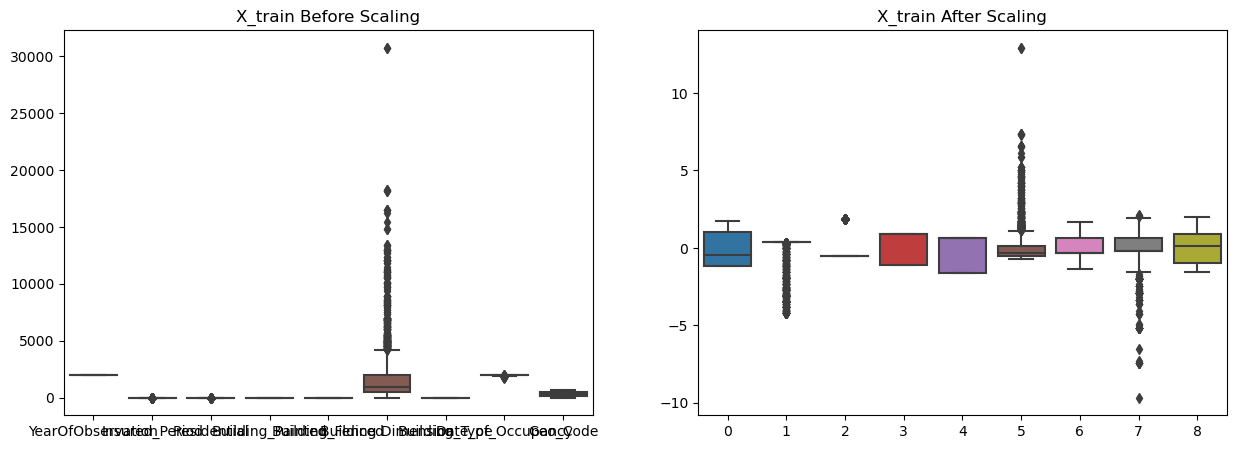

In [117]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_test)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=df_test_scaled)
plt.title('X_train After Scaling')

In [118]:
X_train_scaled.shape

(5728, 9)

In [119]:
df_test_scaled.shape

(3069, 9)

In [127]:
import math

In [121]:
Ridge = ridge.predict(df_test_scaled)

In [129]:
print(LinearR)

[0.10766352 0.09157734 0.05286224 ... 0.15803887 0.20304687 0.17845224]


In [130]:
print(Ridge)

[0.10769145 0.09160772 0.05288362 ... 0.15804974 0.20300887 0.17845037]


In [137]:
df_test = pd.read_csv('./data/test_data.csv')
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [138]:
#Rename a columns
df_test.rename(columns={'Customer Id': "Customer_Id"}, inplace=True)

In [139]:
df_test.head()

,Customer_Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [141]:
my_submission_L = pd.DataFrame({'Customer Id': df_test.Customer_Id, 'Claim': LinearR})


# you could use any filename. We choose submission here
my_submission_L.to_csv('submission1.csv', index=False)

In [143]:
my_submission_R = pd.DataFrame({'Customer Id': df_test.Customer_Id, 'Claim': Ridge})


# you could use any filename. We choose submission here
my_submission_R.to_csv('submission2.csv', index=False)